In [201]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
import csv
import matplotlib.pyplot
from matplotlib import pyplot as plt
from sklearn import datasets

In [202]:
maxAcc = 0.0
maxIter = 0
C_Lambda = 0.8
TrainingPercent = 70
ValidationPercent = 10
TestPercent = 20
PHI = []

In [203]:
df_gsc = pd.read_csv(r'D:\sem1\intro to ml\project 2\GSC-Dataset\GSC-Dataset\GSC-Features-Data\GSC-Features.csv')
df_gsc_diff1 = pd.read_csv(r'D:\sem1\intro to ml\project 2\GSC-Dataset\GSC-Dataset\GSC-Features-Data\diffn_pairs.csv')
df_gsc_same1 = pd.read_csv(r'D:\sem1\intro to ml\project 2\GSC-Dataset\GSC-Dataset\GSC-Features-Data\same_pairs.csv')
df_gsc_same = df_gsc_same1.sample(n=10000)
df_gsc_diff = df_gsc_diff1.sample(n=10000)

frames1 = [df_gsc_same,df_gsc_diff]
df_output1 = pd.concat(frames1)
df_o1 = df_gsc_same.rename(index = str, columns ={"img_id_A" : "img_id"})
#print(df_o1)
con_num1 = pd.merge(df_o1, df_gsc, on='img_id')

con_num3 = con_num1.rename(index = str, columns ={"img_id" : "img_id_A"})
#print(con_num3)
#df_o2 = df_o1.rename(index = str, columns ={"img_id" : "img_id_A"})

#df_o3 = con_num3.rename(index = str, columns ={"img_id_B" : "img_id"})
df_o3 = con_num3.rename(index = str, columns ={"img_id_B" : "img_id"})
con_num2 = pd.merge(df_o3, df_gsc, on='img_id')
final_con1 = con_num2.rename(index = str, columns ={"img_id" : "img_id_B"})

##########################################################

df_diff = df_gsc_diff.rename(index = str, columns ={"img_id_A" : "img_id"})
#print(df_o1)
con_num7 = pd.merge(df_diff, df_gsc, on='img_id')

con_num4 = con_num7.rename(index = str, columns ={"img_id" : "img_id_A"})
#print(con_num3)
#df_o2 = df_o1.rename(index = str, columns ={"img_id" : "img_id_A"})

#df_o3 = con_num3.rename(index = str, columns ={"img_id_B" : "img_id"})
df_o4 = con_num4.rename(index = str, columns ={"img_id_B" : "img_id"})
con_num5 = pd.merge(df_o4, df_gsc, on='img_id')
final_con2 = con_num5.rename(index = str, columns ={"img_id" : "img_id_B"})

################################################################
df_gsc_same_train = final_con1[0:7000]
df_gsc_same_val = final_con1[7000:8000]
df_gsc_same_test = final_con1[8000:10000]

df_gsc_diff_train = final_con2[0:7000]
df_gsc_diff_val = final_con2[7000:8000]
df_gsc_diff_test = final_con2[8000:10000]

frames_train = [df_gsc_same_train,df_gsc_diff_train]
df_train = pd.concat(frames_train)

frames_val = [df_gsc_same_val,df_gsc_diff_val]
df_val = pd.concat(frames_val)

frames_test = [df_gsc_same_test,df_gsc_diff_test]
df_test = pd.concat(frames_test)


frames2 = [df_train,df_val,df_test]
final_data = pd.concat(frames2)
print(final_data)
final_data.insert(1027,'target_new',0)
final_data.loc[:,'target_new'] = final_data['target']
final_data.drop(final_data.columns[[2]], axis=1,inplace=True)
#print(final_data)
#print(df_test)
df_test.insert(1027,'target_new',0)
df_test.loc[:,'target_new'] = df_test['target']
df_test.drop(df_test.columns[[2]], axis=1,inplace=True)

tardf = df_test.copy()

#final_data = final_data1.sample(frac=1, axis=0).reset_index(drop=True)
final_data.to_csv(r"C:\Users\Jayanth\Downloads\gsc-concat.csv")
print(final_data)
#sub_copy = final_con.copy()
 


            img_id_A        img_id_B  target  f1_x  f2_x  f3_x  f4_x  f5_x  \
0     0454a_num1.png  0454c_num3.png       1     0     0     0     0     0   
1     0454b_num2.png  0454c_num3.png       1     0     0     0     0     0   
2     0454a_num1.png  0454a_num4.png       1     0     0     0     0     0   
3     0174a_num4.png  0174c_num1.png       1     0     1     1     0     0   
4     0174b_num1.png  0174c_num1.png       1     0     0     0     0     0   
5     0291a_num4.png  0291c_num1.png       1     0     0     0     0     0   
6     0291a_num5.png  0291c_num1.png       1     0     0     0     0     0   
7     0291b_num1.png  0291c_num1.png       1     0     0     0     0     0   
8     0291a_num4.png  0291c_num3.png       1     0     0     0     0     0   
9     0291a_num4.png  0291c_num4.png       1     0     0     0     0     0   
10    0291b_num2.png  0291c_num4.png       1     0     0     0     0     0   
11    0291a_num3.png  0291c_num4.png       1     0     0     0  

            img_id_A        img_id_B  f1_x  f2_x  f3_x  f4_x  f5_x  f6_x  \
0     0454a_num1.png  0454c_num3.png     0     0     0     0     0     0   
1     0454b_num2.png  0454c_num3.png     0     0     0     0     0     0   
2     0454a_num1.png  0454a_num4.png     0     0     0     0     0     0   
3     0174a_num4.png  0174c_num1.png     0     1     1     0     0     0   
4     0174b_num1.png  0174c_num1.png     0     0     0     0     0     0   
5     0291a_num4.png  0291c_num1.png     0     0     0     0     0     0   
6     0291a_num5.png  0291c_num1.png     0     0     0     0     0     0   
7     0291b_num1.png  0291c_num1.png     0     0     0     0     0     0   
8     0291a_num4.png  0291c_num3.png     0     0     0     0     0     0   
9     0291a_num4.png  0291c_num4.png     0     0     0     0     0     0   
10    0291b_num2.png  0291c_num4.png     0     0     0     0     0     0   
11    0291a_num3.png  0291c_num4.png     0     0     0     0     0     0   
12    0291c_

In [204]:
def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    #print("Raw Training Generated..")
   # print(t.shape)
    return t

# put the data of csv file to matrix form
def GenerateRawData(filePath):    
    dataMatrix = [] 
    dataMatrix1 = []
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)
            
    #dataMatrix1 = np.transpose(dataMatrix)     
    #print ("Data Matrix Generated..")
    dataMatrix = np.transpose(dataMatrix)
    print(dataMatrix.shape)
    return dataMatrix
# Training percent is set (which can be changed for tuning)
# target list is made up from the data sets passed
def GenerateTrainingTarget(rawTraining,TrainingPercent = 70):
    TrainingLen = int(math.ceil(len(rawTraining)*TrainingPercent*0.01))
    t           = rawTraining[:TrainingLen]
    #print(str(TrainingPercent) + "% Training Target Generated..")
    #print(t.shape)
    return t
# generate the data matrix with the 80% training set

def GenerateTrainingDataMatrix(rawData, TrainingPercent = 70):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    #print(str(TrainingPercent) + "% Training Data Generated..")
    print(d2.shape)
    return d2
#data being made for validation of the model which is 10% of the dataset

def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..") 
    print(dataMatrix.shape)
    return dataMatrix
def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Target Data Generated..")
    #print(t.shape)
    return t

#BIGSIGMA : generates a covariance matrix.Each value will be covariance of a element with i-th and j-th elements of an random vector
#this is used to regularize
def GenerateBigSigma(Data, MuMatrix,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    print(DataT)
    TrainingLen = math.ceil(len(DataT)*TrainingPercent*0.01)        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j] + 0.2
    
    BigSigma = np.dot(200,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma

def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L
#gets guassian radial basis function
def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x
#This generates the design matrix, features of the original input
def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 70):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*TrainingPercent*0.01)         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    #print(BigSigInv.shape)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI
# to generate the weight matrix
def GetWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    ##print ("Training Weights Generated..")
    return W
#gets the linear regression values
def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y
#function to get the root mean square error
def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

In [205]:
# splitting final data into training and testing 
train1 = final_data.drop(final_data.columns[[0]], axis=1)
train2 = train1.drop(train1.columns[[0]], axis=1)
train2.drop(train2.columns[[1024]], axis=1,inplace = True)
#sub_copy = train2.copy()
#train3 = train2[(train2.T != 0).any()]
#print(train2)
tar_ma = final_data[['target_new']].copy()
train2.to_csv(r"D:\sem1\intro to ml\project 2\final-gsc.csv", header=False,index =False)
tar_ma.to_csv(r"D:\sem1\intro to ml\project 2\target-gsc.csv", header=False,index = False)

sub_copy = train2.copy()
###########################################################
for i in range(0,512):
    sub_copy.iloc[:, [i]] =abs(sub_copy.iloc[:, [i+512]].values-sub_copy.iloc[:, [i]].values)

sub_copy.to_csv(r"D:\sem1\intro to ml\project 2\sub-gsc.csv", header=False,index = False)

In [206]:
RawTarget = GetTargetVector(r"D:\sem1\intro to ml\project 2\target-gsc.csv")
#RawTarget = tar_ma
#RawData   = GenerateRawData(r"D:\sem1\intro to ml\project 2\final-gsc.csv")
RawData   = GenerateRawData(r"D:\sem1\intro to ml\project 2\sub-gsc.csv")

C:\Users\Jayanth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jayanth\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 'U' mode is deprecated
  from ipykernel import kernelapp as app


(1024, 20000)


In [207]:
TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)
print(TrainingTarget.shape)

(1024, 14000)
(14000,)


In [208]:
ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))
print(ValData.shape)

(1024, 1999)
(1024, 1999)


In [209]:
TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))
print(TestData.shape)

(1024, 3999)
(1024, 3999)


In [210]:
M=15
kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingData))
Mu = kmeans.cluster_centers_
print(RawData.shape)
ErmsArr = []
AccuracyArr = []

BigSigma     = GenerateBigSigma(RawData, Mu, TrainingPercent)
#print(BigSigma.shape)
print(Mu.shape)
print(RawData.shape)
TRAINING_PHI = GetPhiMatrix(RawData, Mu, BigSigma, TrainingPercent)
W            = GetWeightsClosedForm(TRAINING_PHI,TrainingTarget,(C_Lambda)) 
print(TRAINING_PHI.shape)
TEST_PHI     = GetPhiMatrix(TestData, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ValData, Mu, BigSigma, 100)



(1024, 20000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(15, 1024)
(1024, 20000)
(14000, 15)


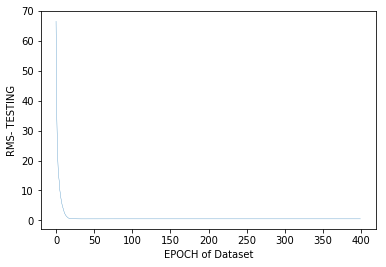

In [211]:
W_Now        = np.dot(220, W)
# hyperparameter 
La           = 2
#lamda
#hyperparameter 
learningRate = 0.1
#0.1 test = 0.64
#0.5 test =
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []
acc  = []
L_Erms_Acc = []
#L_Erms_Val_acc = []


for i in range(0,400):
    #go through the phi matrix rows for the epochs which we set
    #print ('---------Iteration: ' + str(i) + '--------------')
    
    Delta_E_D     = -np.dot((TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    # update weights
    
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
    Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
    
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,TestDataAct)
    acc.append(float(Erms_TR.split(',')[0]))
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    
    L_Erms_Acc.append(float(Erms_Test.split(',')[0]))

#plot the graph
plt.plot([m for m in range(0,400)], L_Erms_Test, linewidth = 0.30);
plt.xlabel("EPOCH of Dataset")
plt.ylabel("RMS- TESTING")
plt.show()


In [212]:
print ("")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
print ("Testing Accuracy = " + str(np.around(max(L_Erms_Acc),5)))



E_rms Training   = 0.48278
E_rms Validation = 0.48272
E_rms Testing    = 0.48377
Testing Accuracy = 66.89172


In [238]:
X= np.transpose(TrainingData)
Xt=np.transpose(TestData)

yt=TestDataAct
yt=m.reshape(-1)
m = TrainingTarget
y=m.reshape(-1)

#print(y.shape)


In [239]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print()
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    def predict(self, X):
        return self.predict_prob(X).round()

In [ ]:
model = LogisticRegression(lr=0.1, num_iter=15000)
#print(X.shape,y.shape)
%time model.fit(X, y)

In [ ]:
preds = model.predict(Xt)
#test = model.predict(Xt)
(preds == yt).mean()